In [54]:
from fastbook import *
from fastdownload import download_url
from fastai.vision.all import *

In [55]:
urls = search_images_ddg("bird photo", max_images=1)
len(urls),urls[0]

(1, 'https://www.biology-questions-and-answers.com/images/Birds.jpg')

In [56]:
dest = Path('bird.jpg')
if not dest.exists(): download_url(urls[0],dest, show_progress=False)

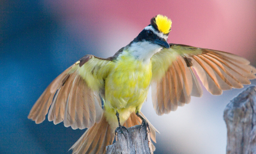

In [57]:
im = Image.open(dest)
im.to_thumb(256,256)

In [78]:
searches = 'Forest', 'Bird', 'Dog', 'Cat'
path = Path('bird_or_not')
for o in searches:
    dest = (path/o)
    if not dest.exists():
        dest.mkdir(exist_ok=True, parents=True)
        results = search_images_ddg(f'{o} photo')
        download_images(dest, urls=results[:200])
        resize_images(dest, max_size=400, dest=dest)

/Users/chreachanchhunneng/Library/Python/3.9/lib/python/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [79]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#3) [None,None,None]

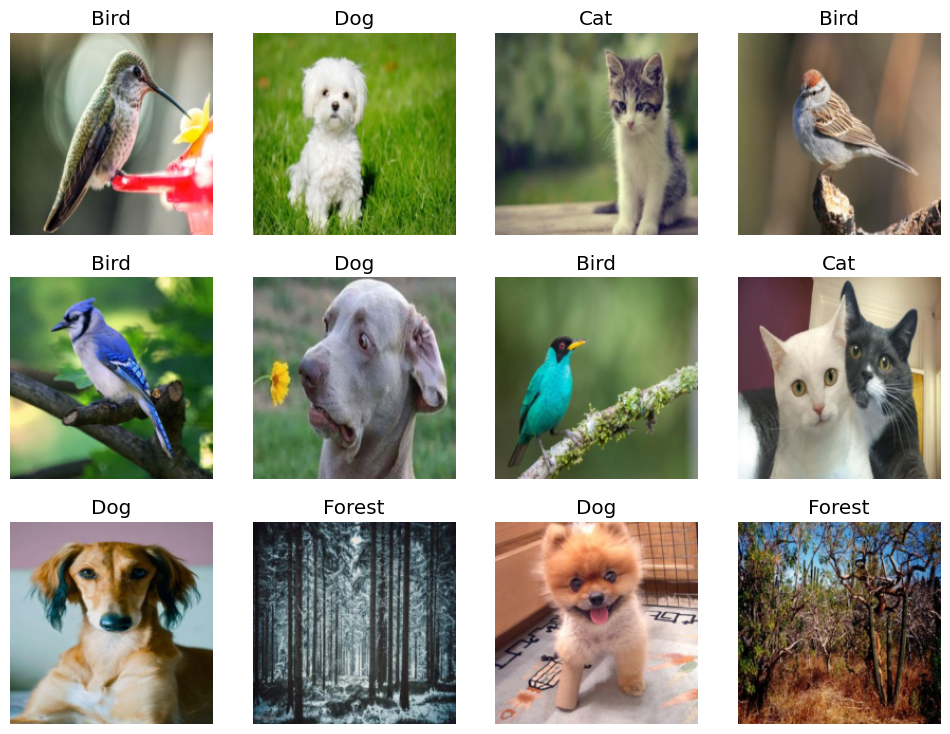

In [80]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)
dls.show_batch(max_n=12)

In [81]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.078460,0.110266,0.046980,00:23


epoch,train_loss,valid_loss,error_rate,time
0,0.115900,0.055708,0.026846,00:31
1,0.073971,0.066788,0.020134,00:32
2,0.057215,0.044907,0.020134,00:31
3,0.045883,0.040514,0.006711,00:29


In [83]:
is_bird, _, probs = learn.predict(PILImage.create('cat.jpeg'))
print(f'This is a: {is_bird}.')
print(f"Probability it's a bird: {probs[0]:.4f}",probs)

This is a: Cat.
Probability it's a bird: 0.0000 TensorBase([1.3301e-09, 1.0000e+00, 3.4366e-08, 1.0940e-08])
